# Case Study: Cigarette Sales in the USA from 1963 and 1992

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import qgrid
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
qgrid.nbinstall()
%matplotlib inline
plt.style.use(u'fivethirtyeight')

/Users/fernandogelin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
cig = pd.read_csv('../cigarette-analysis/dataset.csv')
del cig['Unnamed: 0']

In [3]:
cig.head()

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,1,63,28.6,3383,2236.5,30.6,1558.304530,93.9,26.1
1,1,64,29.8,3431,2276.7,31.0,1684.073202,95.4,27.5
2,1,65,29.8,3486,2327.5,31.5,1809.841875,98.5,28.9
3,1,66,31.5,3524,2369.7,32.4,1915.160357,96.4,29.5
4,1,67,31.6,3533,2393.7,33.4,2023.546368,95.5,29.6


In [4]:
fips = pd.read_excel("https://www.census.gov/2010census/xls/fips_codes_website.xls")
fips_state = fips[['State Abbreviation', 'State FIPS Code']]
fips_state = fips_state.drop_duplicates().reset_index()
state = fips_state['State Abbreviation']
fips = fips_state['State FIPS Code']
fips_state_dict = {}
for i in xrange(len(state)):
    fips_state_dict[fips[i]] = state[i]
cig['state'] = cig['state'].map(fips_state_dict, 'ignore')

In [5]:
cig.head()

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,AL,63,28.6,3383,2236.5,30.6,1558.304530,93.9,26.1
1,AL,64,29.8,3431,2276.7,31.0,1684.073202,95.4,27.5
2,AL,65,29.8,3486,2327.5,31.5,1809.841875,98.5,28.9
3,AL,66,31.5,3524,2369.7,32.4,1915.160357,96.4,29.5
4,AL,67,31.6,3533,2393.7,33.4,2023.546368,95.5,29.6


In [27]:
#states not in dataset
for i in [x for x in list(state) if x not in cig['state'].unique()]:
    print(i)

AK
CA
FL
NJ
ND
WA
WV
WI
WY
PR


In [28]:
cig.describe()

,year,price,pop,pop16,cpi,ndi,sales,pimin
count,1380.000000,1380.000000,1380.000000,1380.000000,1369.000000,1370.000000,1374.000000,1380.000000
mean,77.500000,68.699928,4537.113188,3366.616087,73.793791,7524.360314,123.960189,62.899275
std,8.658579,41.986261,4828.836452,3641.847150,36.568576,4753.818510,31.056532,38.323126
min,63.000000,23.400000,319.000000,215.200000,30.600000,1322.572977,53.400000,23.400000
25%,70.000000,34.775000,1053.000000,781.175000,38.800000,3319.692843,107.825000,31.975000
50%,77.500000,52.300000,3174.000000,2315.300000,65.200000,6281.200808,121.150000,46.400000
75%,85.000000,98.100000,5280.250000,3914.325000,107.600000,10988.390310,133.200000,90.500000
max,92.000000,201.900000,30703.300000,22920.000000,140.300000,23074.000000,297.900000,178.500000


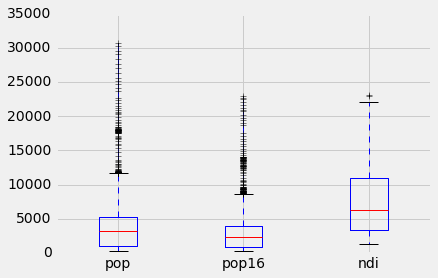

In [29]:
cig[['pop', 'pop16', 'ndi']].boxplot(return_type='axes')

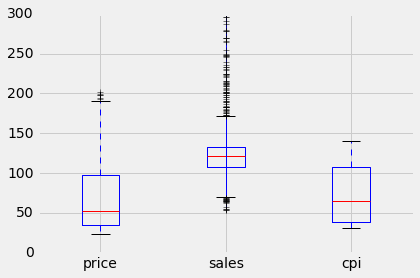

In [30]:
cig[['price', 'sales', 'cpi']].boxplot(return_type='axes')

In [31]:
def line_plot(state):
    cig_1 = cig[cig['state'] == state]
    plt.plot(cig_1['year'], cig_1['sales'])
    plt.plot(cig_1['year'], cig_1['pimin'])

<function __main__.line_plot>

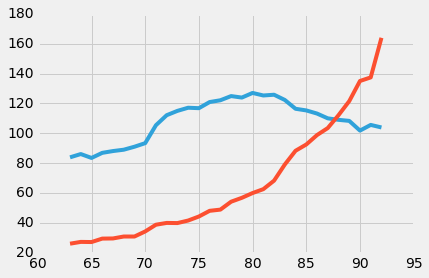

In [32]:
interact(line_plot, state='MA')

Data Transformation

In [33]:
index_cpi_na = cig[cig['cpi'].isnull()].index.values

for index in index_cpi_na:
    year = cig.ix[index,['cpi','year']]['year']
    try:
        cig.ix[index, 'cpi'] = cig.ix[index+30, 'cpi']
    except:
        cig.ix[index, 'cpi'] = cig.ix[index-30, 'cpi']
        
cpi_2016 = 240.236
cig['adjusted_price'] = cig.apply(lambda x: x['price']*(cpi_2016/x['cpi']),axis=1)
cig['adjusted_min_price'] = cig.apply(lambda x: x['pimin']*(cpi_2016/x['cpi']),axis=1)
cig['adjusted_ndi'] = cig.apply(lambda x: x['ndi']*(cpi_2016/x['cpi']),axis=1)

In [34]:
def line_plot_adjusted(state):
    cig_1 = cig[cig['state'] == state]
    plt.plot(cig_1['year'], cig_1['sales'])
    plt.plot(cig_1['year'], cig_1['adjusted_min_price'])

<function __main__.line_plot_adjusted>

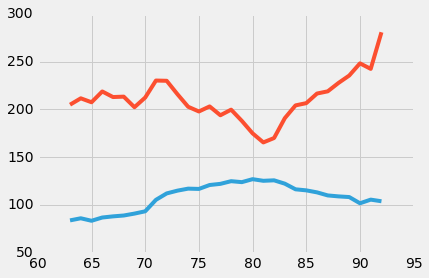

In [35]:
interact(line_plot_adjusted, state='MA')

In [36]:
cig = cig.dropna()

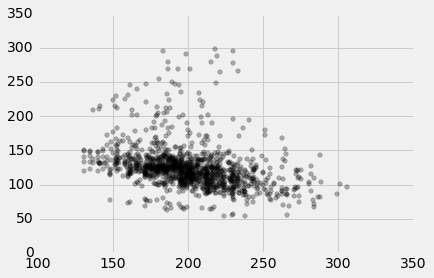

In [37]:
plt.scatter(cig['adjusted_min_price'], cig['sales'], color='black', alpha=0.3)

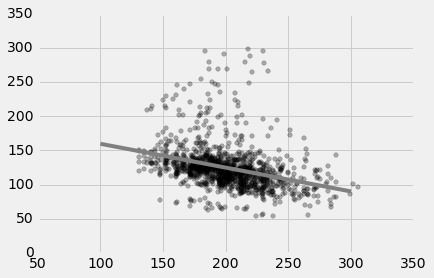

In [38]:
m, b = np.polyfit(cig['adjusted_min_price'], cig['sales'], 1)
x = np.linspace(100, 300, 10)
y = b + m * x
plt.scatter(cig['adjusted_min_price'], cig['sales'], color='black', alpha=0.3)
plt.plot(x, y, color='gray')

In [19]:
cig.head()

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,adjusted_price,adjusted_min_price,adjusted_ndi
0,AL,63,28.6,3383,2236.5,30.6,1558.304530,93.9,26.1,224.534301,204.907176,12234.014609
1,AL,64,29.8,3431,2276.7,31.0,1684.073202,95.4,27.5,230.936542,213.112581,13050.806770
2,AL,65,29.8,3486,2327.5,31.5,1809.841875,98.5,28.9,227.270883,220.406997,13802.830880
3,AL,66,31.5,3524,2369.7,32.4,1915.160357,96.4,29.5,233.562778,218.733395,14200.322950
4,AL,67,31.6,3533,2393.7,33.4,2023.546368,95.5,29.6,227.289150,212.903760,14554.751054


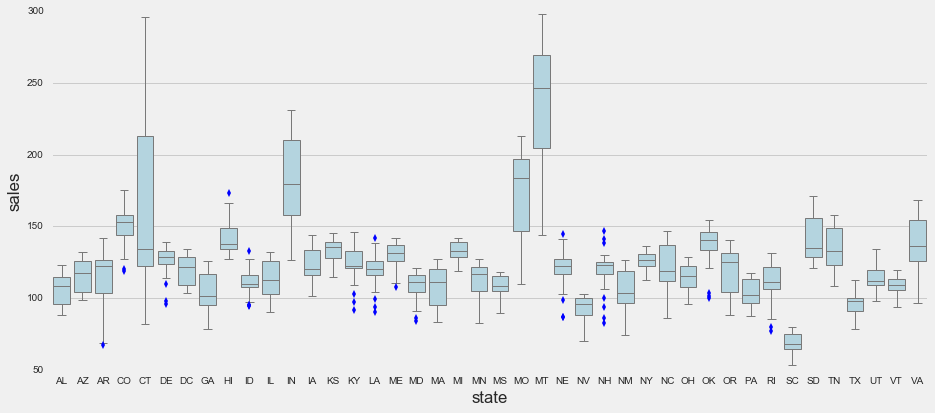

In [20]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(ax=ax, x="state", y="sales", color='lightblue', data=cig, linewidth=1)

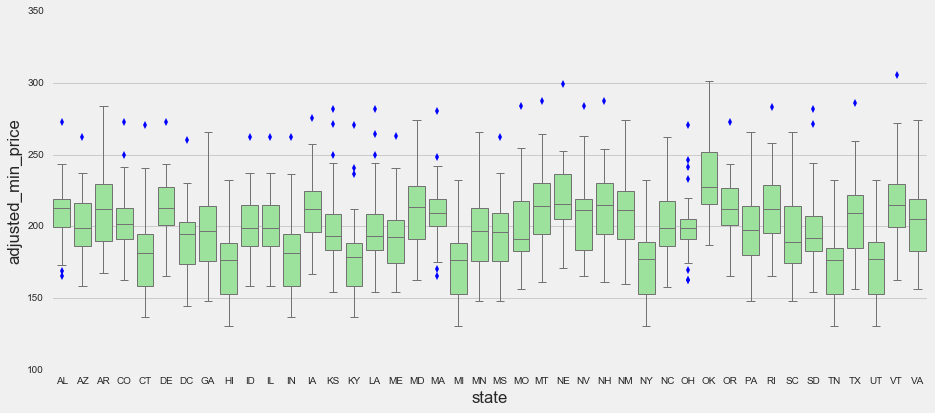

In [21]:
bfig, bx = plt.subplots(figsize=(14, 6))
sns.boxplot(ax=bx, x="state", y="adjusted_min_price", color='lightgreen', data=cig, linewidth=1)

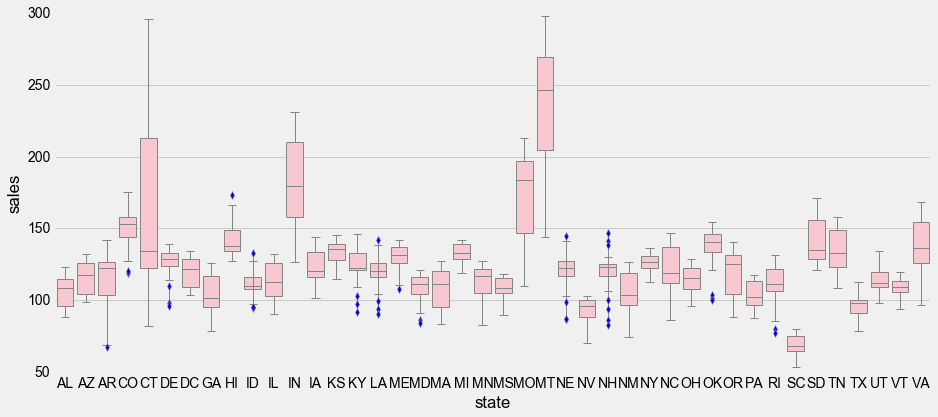

In [33]:
cfig, cx = plt.subplots(figsize=(14, 6))
sns.boxplot(ax=cx, x="state", y="sales", color='pink', data=cig, linewidth=1)

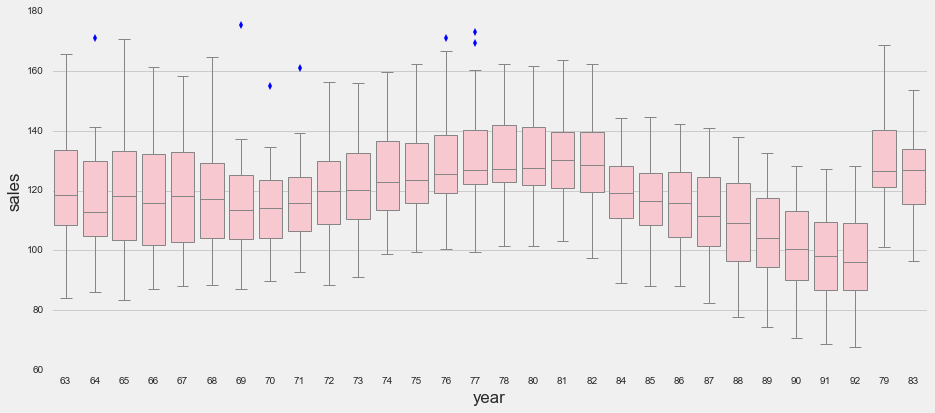

In [46]:
cfig, cx = plt.subplots(figsize=(14, 6))
sns.boxplot(ax=cx, x="year", y="sales", color='pink', data=cig[~cig['state'].isin(['MO','MT','IN','CT','SC'])], linewidth=1)